In [2]:
import pandas as pd

df = pd.read_csv('SF_case_data.csv')
df.head(10)

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
5,2020-01-01,app_start,NaN,android,5148476,male,Saint-Petersburg,-
6,2020-01-01,app_start,NaN,android,8383386,female,Saint-Petersburg,vk_ads
7,2020-01-01,app_start,NaN,android,8581267,female,Saint-Petersburg,google_ads
8,2020-01-01,app_start,NaN,ios,10144701,female,Moscow,-
9,2020-01-01,app_start,NaN,ios,10274354,female,Saint-Petersburg,instagram_ads


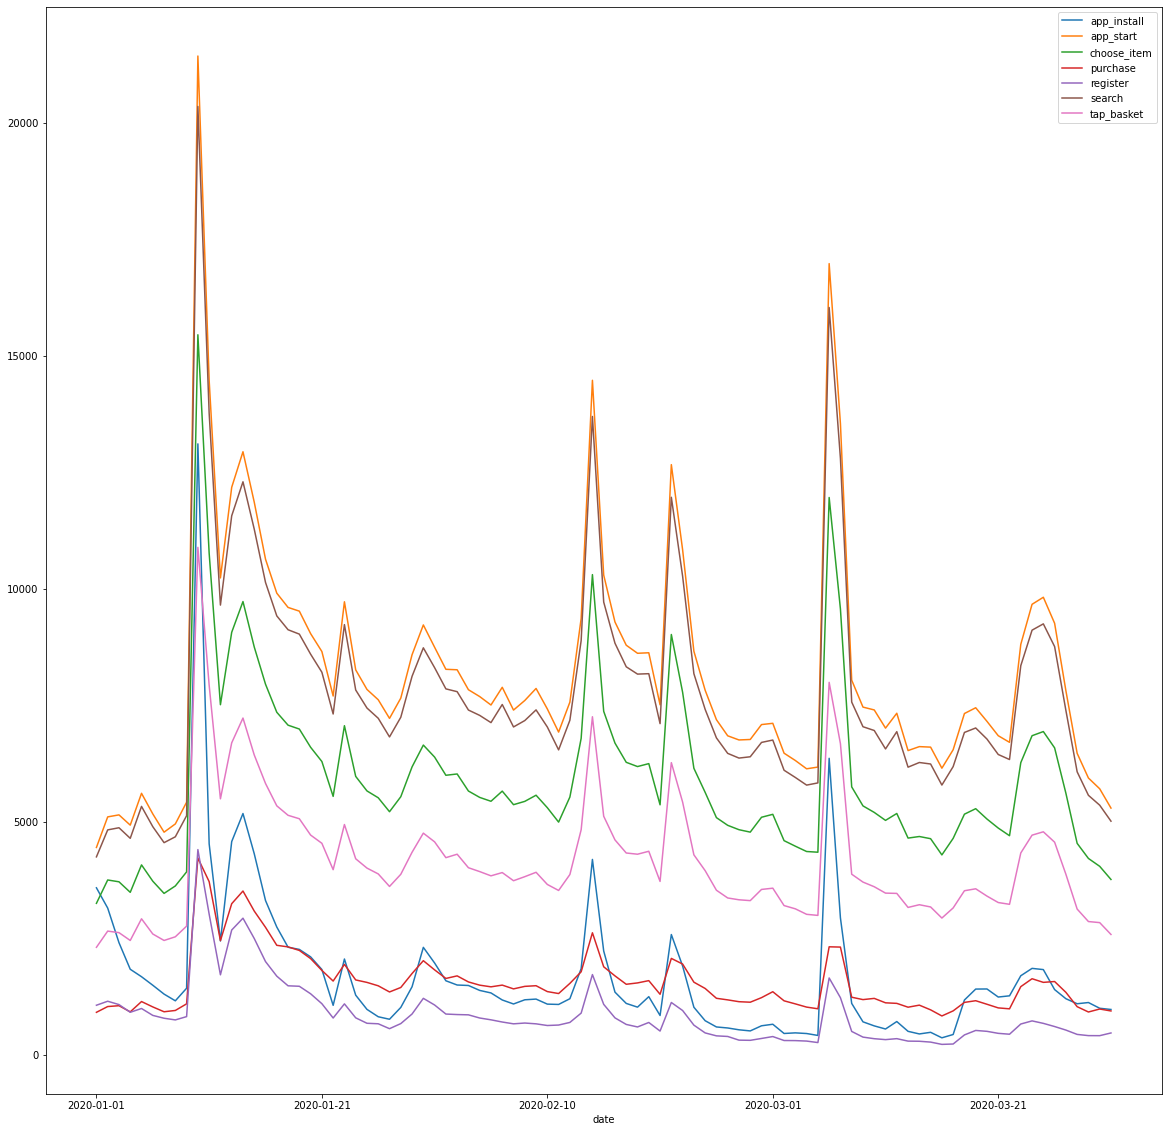

In [3]:
df1 = df.groupby(['date', 'event']).device_id.count().reset_index(name='users')
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=[20, 20])

for key, grp in df1.groupby(['event']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='users', label=key)

plt.legend(loc='best')
plt.show()

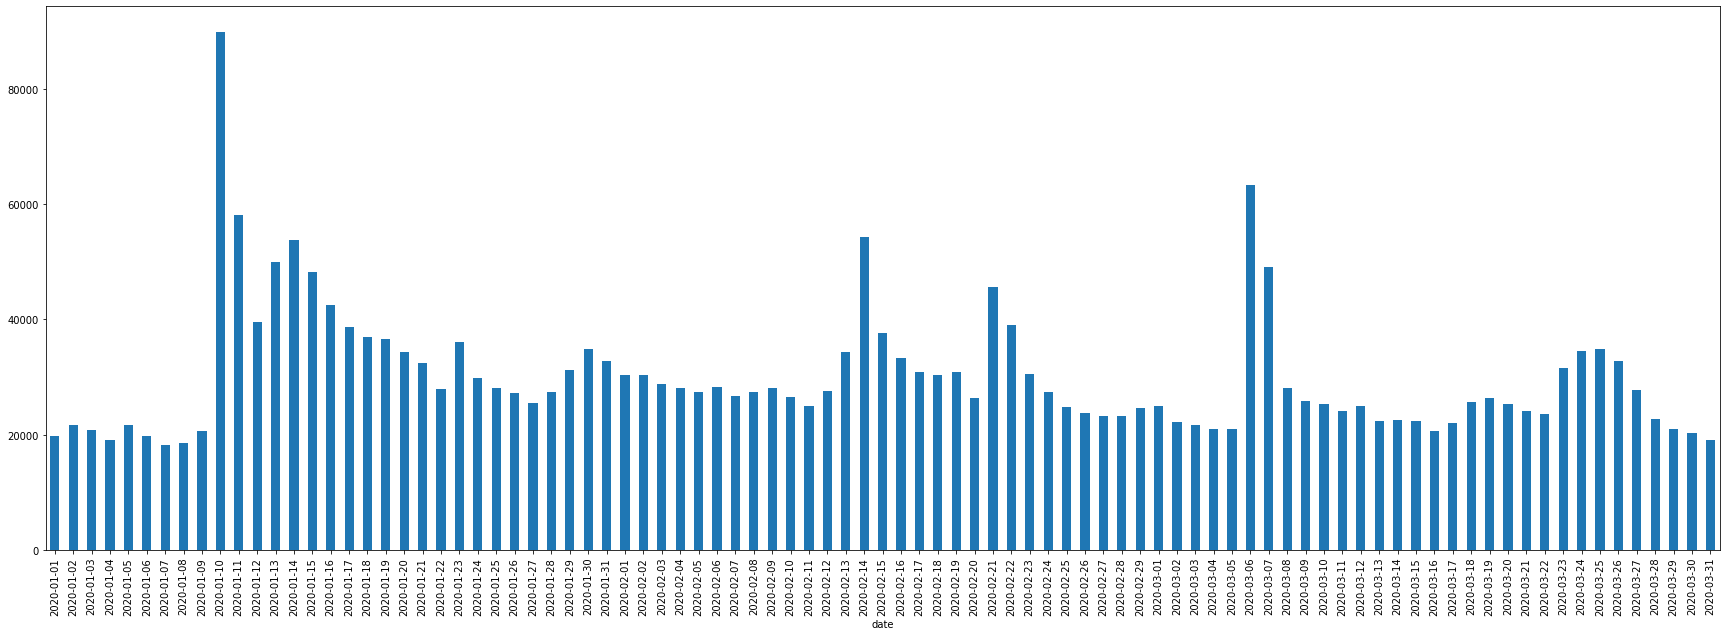

In [4]:
bydate = df.groupby('date').count().event
bydate.plot(kind='bar', figsize=[30, 10])

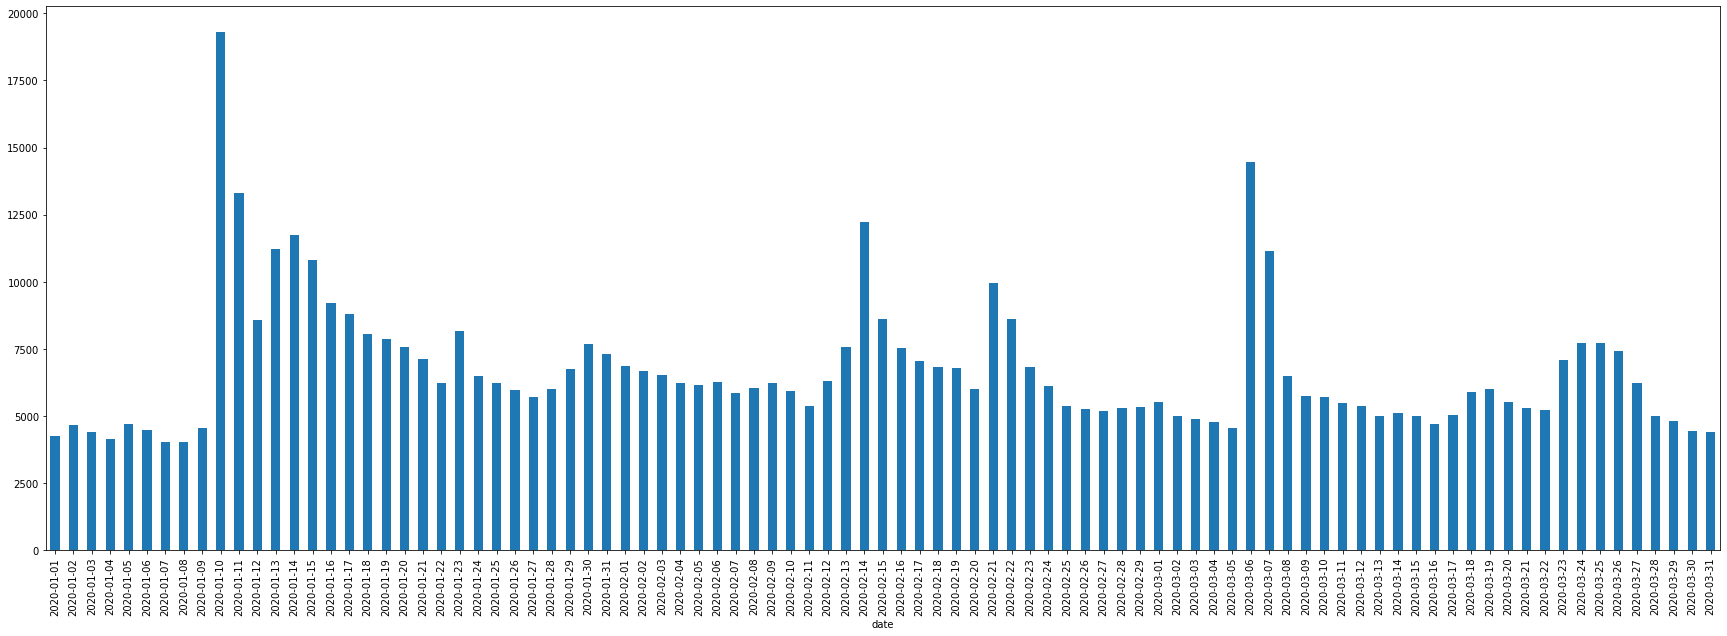

In [5]:
bydate = df[df.utm_source == '-'].groupby('date').count().event
bydate.plot(kind='bar', figsize=[30, 10])

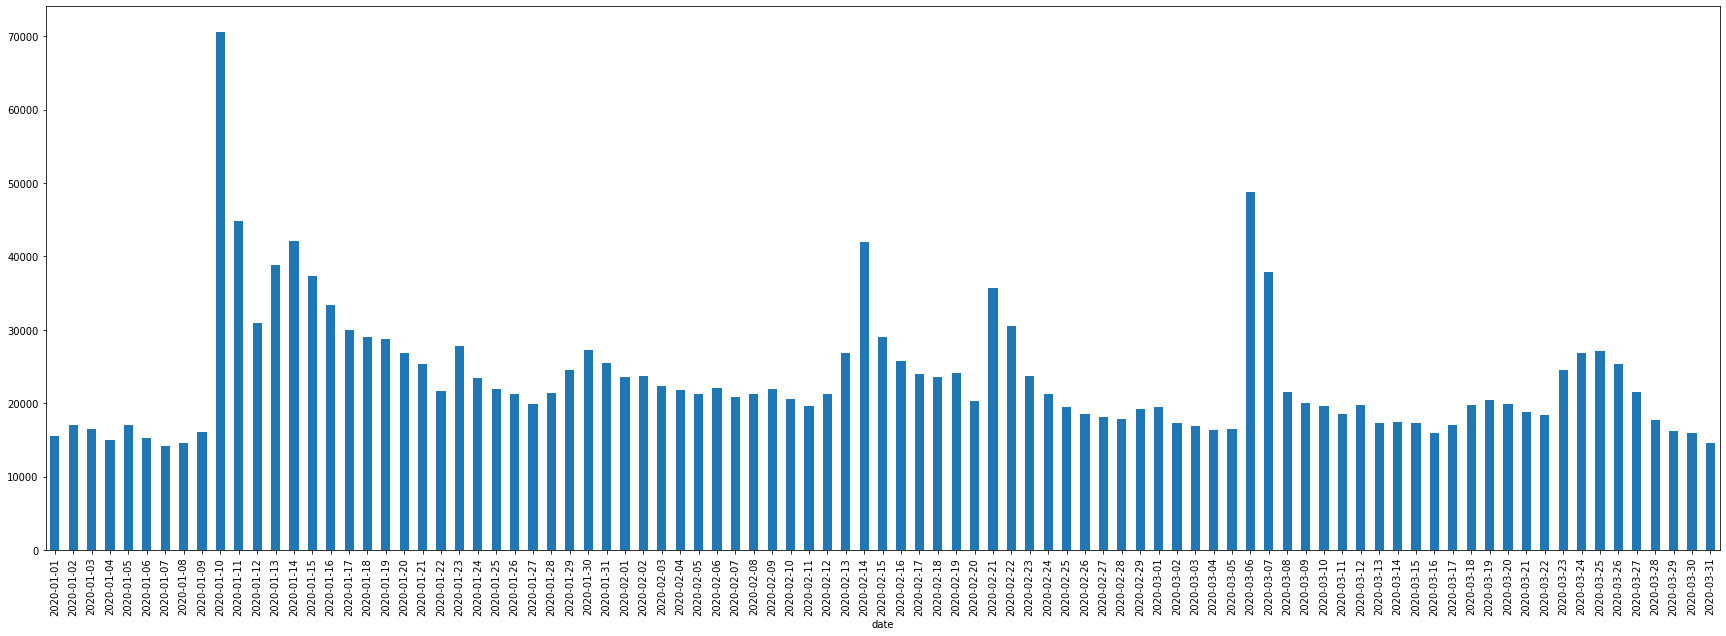

In [6]:
bydate = df[df.utm_source != '-'].groupby('date').count().event
bydate.plot(kind='bar', figsize=[30, 10])

In [7]:
grouped = df.groupby('date').device_id.count().reset_index(name='users')
grouped.index.name = 'id'
grouped
grouped.to_csv('by_date.csv')

In [8]:
installs = df[df['event'] == 'app_install']
df['install_date'] = df['device_id'].map(installs.set_index('device_id')['date'])
def new_column(date1,date2,value):
    if date1 == date2:
        return value
df['install_group'] = df.apply(lambda x: new_column(date1 = x['date'], date2 = x['install_date'], value = 'Установили в этот же день'), axis=1)
df['install_group'] = df['install_group'].fillna('Остальные')
df[df['event'] == 'app_start']['install_group'].value_counts()

Остальные                    594108
Установили в этот же день    154597
Name: install_group, dtype: int64

In [9]:
grouped_by_group = df.groupby(['date', 'install_group']).device_id.count().reset_index(name='users')
#grouped
grouped_by_date = grouped_by_group.groupby('date').users.sum().reset_index(name='all_users')
csv = pd.merge(
    grouped_by_date,
    grouped_by_group[grouped_by_group.install_group == 'Установили в этот же день'][['date', 'users']],
    left_on='date',
    right_on='date'
)
csv.rename(columns={'users':'at_this_day'}, inplace=True)
csv = pd.merge(
    csv,
    grouped_by_group[grouped_by_group.install_group == 'Остальные'][['date', 'users']],
    left_on='date',
    right_on='date'
)
csv.rename(columns={'users':'another'}, inplace=True)

In [10]:
csv.index.name = 'id'
csv.to_csv('install_group.csv')

In [11]:
grouped = df[df.event == 'app_install'].groupby(['date', 'utm_source']).device_id.count().reset_index(name='users')
bydate = grouped.groupby('date').users.sum().reset_index(name='users')

for k in grouped.utm_source.unique():
    print(k)
    bydate = pd.merge(
        bydate,
        grouped[grouped.utm_source == k][['date', 'users']],
        left_on='date',
        right_on='date'        
    )
    k = 'empty' if k == '-' else k
    bydate.rename(columns={'users':k}, inplace=True)
bydate    

-
facebook_ads
google_ads
instagram_ads
referal
vk_ads
yandex-direct


,date,users_x,users_y,facebook_ads,google_ads,instagram_ads,referal,vk_ads,yandex-direct
0,2020-01-01,3579,761,337,617,422,218,555,669
1,2020-01-02,3144,674,277,525,408,207,463,590
2,2020-01-03,2402,514,200,427,303,140,360,458
3,2020-01-04,1831,387,161,330,245,90,275,343
4,2020-01-05,1671,335,160,304,197,108,249,318
...,...,...,...,...,...,...,...,...,...
86,2020-03-27,1199,272,99,177,162,84,178,227
87,2020-03-28,1091,232,88,163,160,68,180,200
88,2020-03-29,1117,239,109,197,132,69,152,219
89,2020-03-30,994,215,94,148,151,63,138,185


In [12]:
bydate.index.name = 'id'
bydate.to_csv('dynamicchannel.csv')
bydate

,date,users_x,users_y,facebook_ads,google_ads,instagram_ads,referal,vk_ads,yandex-direct
id,,,,,,,,,
0,2020-01-01,3579,761,337,617,422,218,555,669
1,2020-01-02,3144,674,277,525,408,207,463,590
2,2020-01-03,2402,514,200,427,303,140,360,458
3,2020-01-04,1831,387,161,330,245,90,275,343
4,2020-01-05,1671,335,160,304,197,108,249,318
...,...,...,...,...,...,...,...,...,...
86,2020-03-27,1199,272,99,177,162,84,178,227
87,2020-03-28,1091,232,88,163,160,68,180,200
88,2020-03-29,1117,239,109,197,132,69,152,219


In [13]:
first_registration = df[df['event'] == 'register'].sort_values('date').drop_duplicates('device_id').copy()
first_registration['finally_registered'] = 1
df['first_registration'] = df['device_id'].map(first_registration.set_index('device_id')['date'])
df['finally_registered'] = df['device_id'].map(first_registration.set_index('device_id')['finally_registered'])
already_reg = df[df['first_registration'] < df['date']].copy()
already_reg['registered'] = 1
requires_reg1 = df[(df['first_registration'].isna() == True)].copy()
requires_reg1['registered'] = 0
requires_reg2 =  df[df['first_registration'] >= df['date']].copy()
requires_reg2['registered'] = 0
df = pd.concat([already_reg,requires_reg1,requires_reg2])

In [21]:
not_reg = df[df['registered'] == 0]
funnel_not_reg = pd.crosstab(not_reg.utm_source, not_reg.event, values=not_reg.device_id, aggfunc=pd.Series.nunique)
funnel_not_reg['1 step'] = funnel_not_reg['search']*100/funnel_not_reg['app_start']
funnel_not_reg['2 step'] = funnel_not_reg['choose_item']*100/funnel_not_reg['app_start']
funnel_not_reg['3 step'] = funnel_not_reg['tap_basket']*100/funnel_not_reg['app_start']
funnel_not_reg['4 step'] = funnel_not_reg['register']*100/funnel_not_reg['app_start']
funnel_not_reg['5 step'] = funnel_not_reg['purchase']*100/funnel_not_reg['app_start']
funnel_not_reg#['5 step'].mean()

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,78.130265,60.043148,33.957263,28.915143
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,78.692178,61.362489,36.467620,31.564340
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,76.628095,58.038459,31.877131,27.326849
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,78.181756,61.158806,36.768478,32.130520
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,79.913897,64.025293,41.658819,37.017355
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,78.576948,61.861342,38.392112,33.749575
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,76.704339,58.108248,31.992327,27.427549


In [22]:
reg = df[df['registered'] == 1]
funnel_reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc=pd.Series.nunique)
funnel_reg['1 step'] = funnel_reg['search']*100/funnel_reg['app_start']
funnel_reg['2 step'] = funnel_reg['choose_item']*100/funnel_reg['app_start']
funnel_reg['3 step'] = funnel_reg['tap_basket']*100/funnel_reg['app_start']
funnel_reg['4 step'] = funnel_reg['purchase']*100/funnel_reg['app_start']
funnel_reg#['4 step'].mean()

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,4 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,92.048091,82.788441,57.920270
facebook_ads,5606,5154,3333,5527,4694,98.590796,91.937210,83.731716,59.454156
google_ads,5399,4948,3121,5335,4438,98.814595,91.646601,82.200407,57.807001
instagram_ads,5686,5288,3548,5618,4842,98.804080,93.000352,85.156525,62.398874
referal,3647,3417,2382,3610,3155,98.985468,93.693447,86.509460,65.313957
vk_ads,6011,5636,3950,5958,5196,99.118283,93.761437,86.441524,65.712860
yandex-direct,5396,4928,3099,5304,4464,98.295033,91.326909,82.727947,57.431431


In [25]:
import pandas as pd

data = pd.read_csv('SF_case_data.csv')

In [42]:
first_purchase = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
p = first_purchase.groupby('utm_source').device_id.count().reset_index(name='users')
#
first_search = data[data['event'] == 'search'].sort_values('date').drop_duplicates('device_id')
s = first_search.groupby('utm_source').device_id.count().reset_index(name='users')
p['search_user'] = p['utm_source'].map(s.set_index('utm_source')['users'])
p['CR'] = p['users']*100/p['search_user']
p.index.name = 'id'
p[['utm_source', 'CR']].sort_values('CR', ascending=False)
p.to_csv('CR.csv')